In [1]:
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix

C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv('traindata.csv')
data.head()

C:\Users\tabme\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBS,CUSTOMERID,CITY,STATE,ZIP,REGION,CURRENTBALANCE,CONTRACT_FEE,TOT_OPEN_AMT,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,ACTIVATED_YEAR,ACTIVATED_MONTH,AGE_RANGE,CREDIT_APPROVAL,RENEWAL_YEAR,RENEWAL_MONTH,CONTACT_METHOD,RATE_PLAN,CHURN
0,1,498696,MONTGOMERY,AL,36117,E_S_CENTRAL,0.00,0.0,0.00,53.51,53.51,5,1999,MAR,30S,None,1999,MAR,OTHER,BASIC,0
1,2,498778,PRATTVILLE,AL,36066,E_S_CENTRAL,273.05,50.0,0.00,566.87,566.87,3,1999,MAR,50S,Manual Review,1999,JUN,OTHER,UNLIMITED,1
2,3,498775,SYLACAUGA,AL,35151,E_S_CENTRAL,37.59,20.0,37.59,174.27,136.68,5,1999,MAR,20S,3 Approved Services,1999,MAR,FAMILY SALE,200 MINUTE,0
3,4,498757,ECLECTIC,AL,36024,E_S_CENTRAL,0.00,0.0,0.00,66.24,66.24,5,1999,MAR,30S,1 Approved Services,1999,MAR,OTHER,BASIC,0
4,5,498752,ANNISTON,AL,36206,E_S_CENTRAL,27.05,20.0,27.05,169.62,142.57,5,1999,MAR,30S,5 Approved Services,1999,MAR,OTHER,200 MINUTE,0


In [3]:
data.shape

(371933, 21)

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
laen_x = LabelEncoder()

In [5]:
data = data.drop('OBS',axis=1)
data = data.drop('CUSTOMERID',axis=1)
data = data.drop('ZIP',axis=1)
data = data.drop('ACTIVATED_MONTH',axis=1)
data = data.drop('RENEWAL_MONTH',axis=1)
data = data.drop('CITY',axis=1)

In [6]:
data.head()

,STATE,REGION,CURRENTBALANCE,CONTRACT_FEE,TOT_OPEN_AMT,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,ACTIVATED_YEAR,AGE_RANGE,CREDIT_APPROVAL,RENEWAL_YEAR,CONTACT_METHOD,RATE_PLAN,CHURN
0,AL,E_S_CENTRAL,0.00,0.0,0.00,53.51,53.51,5,1999,30S,None,1999,OTHER,BASIC,0
1,AL,E_S_CENTRAL,273.05,50.0,0.00,566.87,566.87,3,1999,50S,Manual Review,1999,OTHER,UNLIMITED,1
2,AL,E_S_CENTRAL,37.59,20.0,37.59,174.27,136.68,5,1999,20S,3 Approved Services,1999,FAMILY SALE,200 MINUTE,0
3,AL,E_S_CENTRAL,0.00,0.0,0.00,66.24,66.24,5,1999,30S,1 Approved Services,1999,OTHER,BASIC,0
4,AL,E_S_CENTRAL,27.05,20.0,27.05,169.62,142.57,5,1999,30S,5 Approved Services,1999,OTHER,200 MINUTE,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371933 entries, 0 to 371932
Data columns (total 15 columns):
STATE              371933 non-null object
REGION             371933 non-null object
CURRENTBALANCE     371933 non-null float64
CONTRACT_FEE       371933 non-null float64
TOT_OPEN_AMT       371933 non-null float64
TOT_INVOICE_AMT    371933 non-null float64
TOT_PAID_AMT       371933 non-null float64
NUM_INVOICES       371933 non-null int64
ACTIVATED_YEAR     371933 non-null int64
AGE_RANGE          371933 non-null object
CREDIT_APPROVAL    371933 non-null object
RENEWAL_YEAR       371933 non-null int64
CONTACT_METHOD     371933 non-null object
RATE_PLAN          371933 non-null object
CHURN              371933 non-null int64
dtypes: float64(5), int64(4), object(6)
memory usage: 42.6+ MB


In [8]:
X = data.iloc[:,:-1].values
y = data.iloc[:,14].values

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
laen_x = LabelEncoder()
# X[:,0] = laen_x.fit_transform(X[:,0])
X[:,0] = laen_x.fit_transform(X[:,0])
X[:,1] = laen_x.fit_transform(X[:,1])
X[:,9] = laen_x.fit_transform(X[:,9])
X[:,10] = laen_x.fit_transform(X[:,10])
X[:,13] = laen_x.fit_transform(X[:,13])
X[:,12] = laen_x.fit_transform(X[:,12])

In [10]:
ohe = OneHotEncoder(categorical_features = [0,1,9,10,12,13])
X = ohe.fit_transform(X).toarray()

In [11]:
X

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 5.000e+00, 1.999e+03,
        1.999e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.000e+00, 1.999e+03,
        1.999e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 5.000e+00, 1.999e+03,
        1.999e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 1.997e+03,
        1.998e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.300e+01, 1.997e+03,
        1.999e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+01, 1.997e+03,
        1.997e+03]])

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
X_train = scale_x.fit_transform(X_train)
X_test = scale_x.transform(X_test)

In [14]:
#
#   HELPERS
#   Will be used for recusive calculations
#

cmc = np.array([[0, 1000], [100, 550]]) # Confusion matrix cost

# Get the confusion matrix as costs
def confusion_matrix_cost(Y_pred, Y_obs):
    return confusion_matrix(Y_pred, Y_obs, labels = [0, 1]) * cmc

# Calculate the total Churn Cost per Customer given Y predicted and observed
def calculate_ccpc(Y_pred, Y_obs):
    return np.sum( confusion_matrix_cost(Y_pred, Y_obs) ) / float(len(Y_obs))

# Calculate accuracy by looking at the mean of correct predictions
# Y observed and predicted can be given in any order
def calculate_accuracy(Y_1, Y_2):
    return np.mean(np.logical_not(np.logical_xor(Y_1, Y_2)).astype(int))

In [15]:
ccpc_all_churn = calculate_ccpc(np.ones(len(y_test)), y_test)
ccpc_no_churn = calculate_ccpc(np.zeros(len(y_test)), y_test)

print("Churn cost per customer All churn = " + str(ccpc_all_churn))
print("Churn cost per customer No churn = " + str(ccpc_no_churn))

Churn cost per customer All churn = 267.1521905709331
Churn cost per customer No churn = 371.44931237985134


In [16]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# import os

# import numpy as np
# data = [go.Histogram(x=X_train)]

In [17]:
# py.iplot(data, filename='basic histogram')

# Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr_cf = LogisticRegression() # Logistic Regression Classifier

lr_gs = GridSearchCV(lr_cf, param_grid = {'C': [10**i for i in range(-3, 3)], 'penalty': ['l1', 'l2']}, cv = 5)

lr_gs.fit(X_train, y_train)

lr_est = lr_gs.best_estimator_

In [19]:
print("Using LR params %s produce the best model accuracy: %f" % (lr_gs.best_params_, lr_gs.best_score_))

Using LR params {'C': 0.1, 'penalty': 'l1'} produce the best model accuracy: 0.917465


In [20]:
print("Accuracy on training data = %f" % lr_est.score(X_train, y_train))
print("Accuracy on test data = %f" % lr_est.score(X_test, y_test))

Accuracy on training data = 0.917623
Accuracy on test data = 0.918400


In [21]:
prob_churn = lr_est.predict_proba(X_test)[:,1] # Probabilities to churn

In [22]:
# Predict churn given a probabilistic threshold t
def predict_with_threshold(est, X, t = 0.5):
    return (est.predict_proba(X)[:,1] >= t).astype(int)

# Get the min churn cost per customer, and the associated probability threshold
def churn_cost_per_customer_and_threshold(est, X, Y):
    min_cost, optimal_t = np.max(cmc), 0
    
    for t in np.arange(0, 1.01, 0.01):
        Y_predicted = predict_with_threshold(est, X, t)
        ccpc = calculate_ccpc(Y_predicted, Y)
        
        if ccpc < min_cost:
            min_cost = ccpc
            optimal_t = t
    
    return min_cost, optimal_t

# Only the churn cost per customer
def churn_cost_per_customer(est, X, Y):
    return churn_cost_per_customer_and_threshold(est, X, Y)[0]

# Scorer used in GridSearchCV that minimizes the churn_cost_per_customer (=> maximize the inverse)
def scorer_based_on_churn_cost_per_customer(est, X, Y):
    return 1.0 / churn_cost_per_customer(est, X, Y)

In [23]:
thresholds = np.arange(0, 1.01, 0.01) # The prob. thresholds
scores = []

for t in thresholds:
    Y_predicted = predict_with_threshold(lr_est, X_test, t)
    right_predictions = (Y_predicted == y_test)
    scores.append( np.mean(right_predictions.astype(int)) )

In [24]:
# Getting the threshold that maximizes the score
max_score, max_score_threshold = np.max(scores), thresholds[np.argmax(scores)]
print("Max accuracy occurs at probability threshold %0.2f, with score of %0.2f" % (max_score_threshold, max_score))

Max accuracy occurs at probability threshold 0.45, with score of 0.92


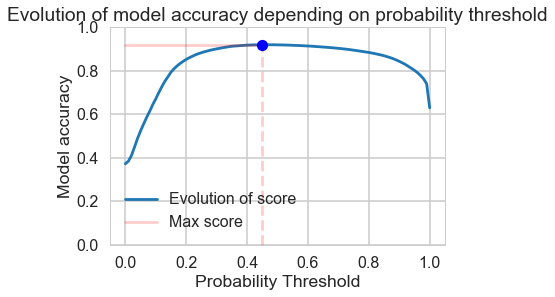

In [25]:
plt.plot(thresholds, scores, label = 'Evolution of score')
plt.plot([0, max_score_threshold], [max_score, max_score], color = 'r', alpha = 0.2, label = 'Max score')
plt.plot([max_score_threshold, max_score_threshold], [0, max_score], 'r--', alpha = 0.2)
plt.plot([max_score_threshold], [max_score], 'bo')
plt.legend()
plt.ylim(0, 1)
plt.xlabel('Probability Threshold')
plt.ylabel('Model accuracy')
plt.title('Evolution of model accuracy depending on probability threshold')
plt.show()

In [26]:
calculate_ccpc(predict_with_threshold(lr_est, X_test, max_score_threshold), y_test)

234.29765953728474

In [27]:
lr_gs = GridSearchCV(lr_cf, param_grid = {'C': [10**i for i in range(-3, 3)], 'penalty': ['l1', 'l2']}, cv = 5, scoring = scorer_based_on_churn_cost_per_customer)

lr_gs.fit(X_train, y_train)

lr_est = lr_gs.best_estimator_

C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [28]:
print("Using LR params %s help get the minimum CCpC" % lr_gs.best_params_)

Using LR params {'C': 0.01, 'penalty': 'l1'} help get the minimum CCpC


In [29]:
new_ccpc, t_with_lowest_ccpc = churn_cost_per_customer_and_threshold(lr_est, X_test, y_test)
print("The lowest churn cost per customer is $%4.2f, using probability threshold of %0.2f" % (new_ccpc, t_with_lowest_ccpc))

The lowest churn cost per customer is $232.73, using probability threshold of 0.34


In [30]:
Y_test_redicted = predict_with_threshold(lr_est, X_test, t_with_lowest_ccpc)
calculate_accuracy(Y_test_redicted, y_test)

0.9096750776345329

In [ ]:
y_log = lr_gs.predict(X_test)

# SVR

In [16]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

In [ ]:
# Look at the results
lw = 2
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_train, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_train, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_train, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()